In [33]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [34]:
puidata = os.getenv("PUIDATA")
puidata

'/nfshome/ri619/PUIdata'

In [35]:
# Pull data from NYC Open Data using Curl and import os
url = "https://data.cityofnewyork.us/api/views/kku6-nxdu/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [36]:
#Using pandas, check the head of the df to see what it looks like
df.head(7)

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
5,10006,6,2,0.33,4,0.67,0,0,6,100,...,6,100,0,0.00,6,1.00,0,0,6,100
6,10007,1,0,0.00,1,1.00,0,0,1,100,...,1,100,1,1.00,0,0.00,0,0,1,100


In [37]:
#only keep two columns that I want to use.

new_df = df[['JURISDICTION NAME','COUNT FEMALE', 'COUNT MALE']]
df = new_df
df.head(7)

,JURISDICTION NAME,COUNT FEMALE,COUNT MALE
0,10001,22,22
1,10002,19,16
2,10003,1,0
3,10004,0,0
4,10005,2,0
5,10006,2,4
6,10007,0,1


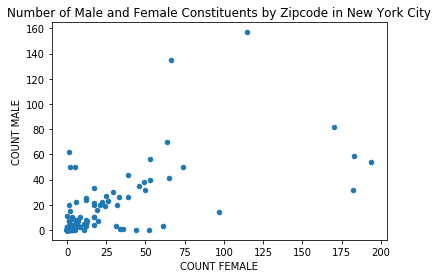

In [43]:
scatterplot = df.plot.scatter(x='COUNT FEMALE', y = 'COUNT MALE', 
                              title = "Number of Male and Female Constituents by Zipcode in New York City")

